In [12]:
import networkx as nx
import matplotlib.pyplot as plt
import sys
import os
import numpy as np
from tqdm import tqdm
import time

from concurrent.futures import ProcessPoolExecutor
from scipy.optimize import curve_fit

import cProfile
import pstats


# Add the project root to sys.path
project_root = os.path.abspath(os.path.join(os.getcwd(), "../.."))
sys.path.append(project_root)

import dagology as dag

np.random.seed(42)

In [13]:
N = 500
D = 2

def calculate_longest_path(n):
    return len(nx.dag_longest_path(dag.causal_set_graph(dag.minkowski_interval(n, D))))

n_range = np.arange(10, N, 20)
lp_lengths = []
times = []

for n in tqdm(n_range):
    start_time = time.time()
    lp_lengths.append(len(nx.dag_longest_path(dag.causal_set_graph(dag.minkowski_interval(n, D), weighted=True))))
    stop_time = time.time()
    elapsed_time = stop_time - start_time
    times.append(elapsed_time)

times, lp_lengths = np.asarray(times), np.asarray(lp_lengths)

100%|██████████| 25/25 [00:11<00:00,  2.24it/s]


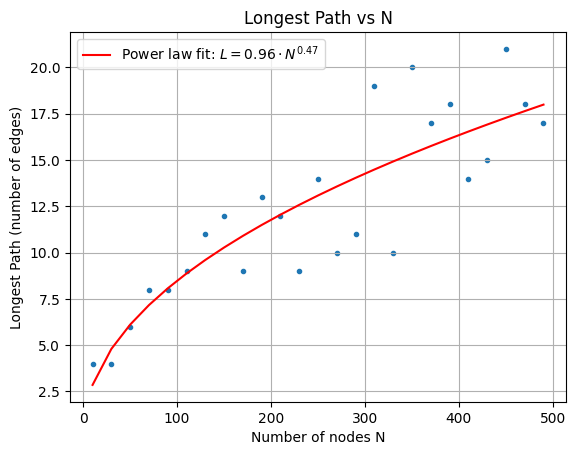

In [14]:
# Define the power law function
power_law = lambda x, a, b: a * np.power(x, b)

# Fit the power law function to the data
params, _ = curve_fit(power_law, n_range, lp_lengths)

# Extract the fitted parameters
a_fit, b_fit = params

# Plot the original data and the fitted power law
plt.scatter(n_range, lp_lengths, marker='.')
plt.title('Longest Path vs N')
plt.xlabel('Number of nodes N')
plt.ylabel('Longest Path (number of edges)')
plt.grid(True)
plt.plot(n_range, power_law(n_range, a_fit, b_fit), label=f'Power law fit: $L = {a_fit:.2f} \cdot N^{{{b_fit:.2f}}}$', color='red')
plt.legend()
plt.show()

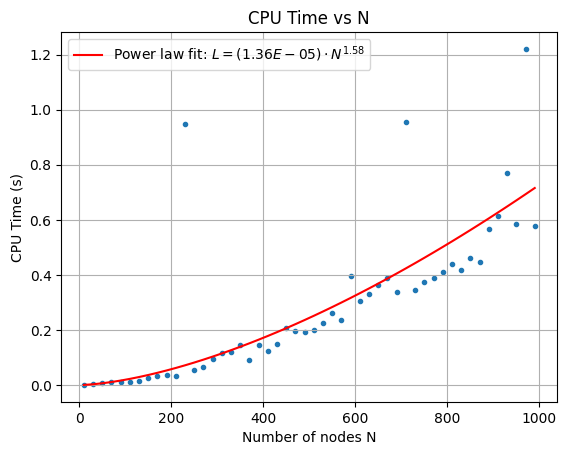

In [9]:
# Fit the power law function to the data
params, _ = curve_fit(power_law, n_range, times)

# Extract the fitted parameters
a_fit, b_fit = params

plt.scatter(n_range, times, marker='.')
plt.title('CPU Time vs N')
plt.xlabel('Number of nodes N')
plt.ylabel('CPU Time (s)')
plt.grid(True)
plt.plot(n_range, power_law(n_range, a_fit, b_fit), label=f'Power law fit: $L = ({a_fit:.2E}) \cdot N^{{{b_fit:.2f}}}$', color='red')
plt.legend()
plt.show()

In [6]:
N = 3000
D = 2

with cProfile.Profile() as pr:
    R = dag.minkowski_interval(N, D)
    G = dag.causal_set_graph(R)
    LP = nx.dag_longest_path(G)

stats = pstats.Stats(pr)
stats.sort_stats(pstats.SortKey.TIME)
stats.print_stats()

         22718723 function calls (22718721 primitive calls) in 12.778 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    5.572    5.572    6.471    6.471 /home/nkozak/.pyenv/versions/3.11.6/envs/dag/lib/python3.11/site-packages/networkx/classes/digraph.py:713(add_edges_from)
     3000    1.579    0.001    3.441    0.001 /home/nkozak/.pyenv/versions/3.11.6/envs/dag/lib/python3.11/site-packages/networkx/algorithms/dag.py:1022(<listcomp>)
  2244690    0.839    0.000    1.590    0.000 <frozen _collections_abc>:859(__iter__)
  2241690    0.748    0.000    0.748    0.000 /home/nkozak/.pyenv/versions/3.11.6/envs/dag/lib/python3.11/site-packages/networkx/classes/coreviews.py:52(__getitem__)
       96    0.742    0.008    0.756    0.008 /home/nkozak/.pyenv/versions/3.11.6/envs/dag/lib/python3.11/site-packages/networkx/algorithms/dag.py:166(topological_generations)
  2244689    0.726    0.000    0.774    0.000 /mnt/c/Users/